# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
#importing the required library
import pandas as pd
covid = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
covid.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [3]:
#getting the number of rows and columns
print(f"The dataset has { covid.shape } rows and columns respectively.")

The dataset has (61942, 5) rows and columns respectively.


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [6]:
# identifying how many unique values each column has using nunique() function
unique_counts = covid.nunique()
unique_counts

date       1158
state        56
fips         56
cases     42710
deaths    19076
dtype: int64

In [5]:
#which column has the greatest number of distinct values using idxmax()
most_diverse_column = unique_counts.idxmax()
most_diverse_column

'cases'

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [9]:
#identying coulmns with redundancies.
columns_with_same_value = unique_counts[unique_counts == 1].index
columns_with_same_value

Index([], dtype='object')

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

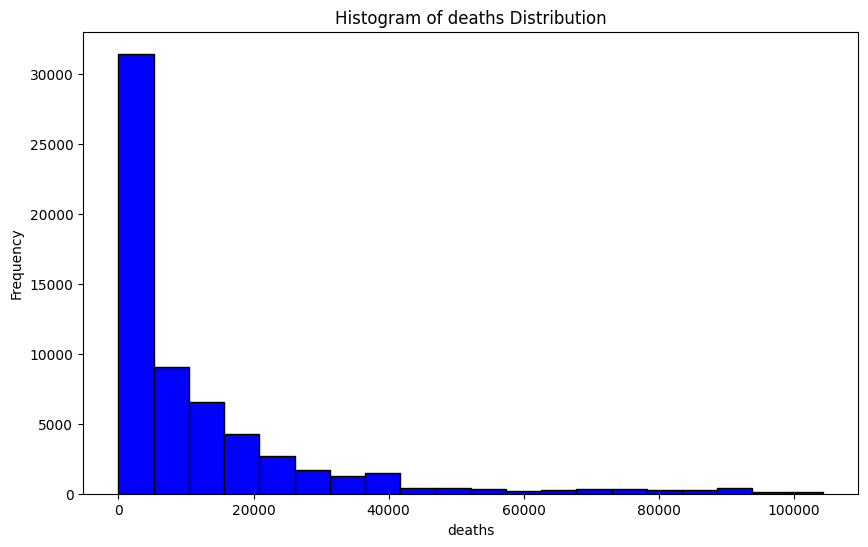

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

numeric_column = 'deaths'
plt.figure(figsize=(10, 6))
plt.hist(covid[numeric_column], bins=20, color='blue', edgecolor='black')
plt.xlabel(numeric_column)
plt.ylabel('Frequency')
plt.title(f'Histogram of {numeric_column} Distribution')
plt.show()


The graph shows the distribution of the deaths it shows that most deaths are around 0-40000

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

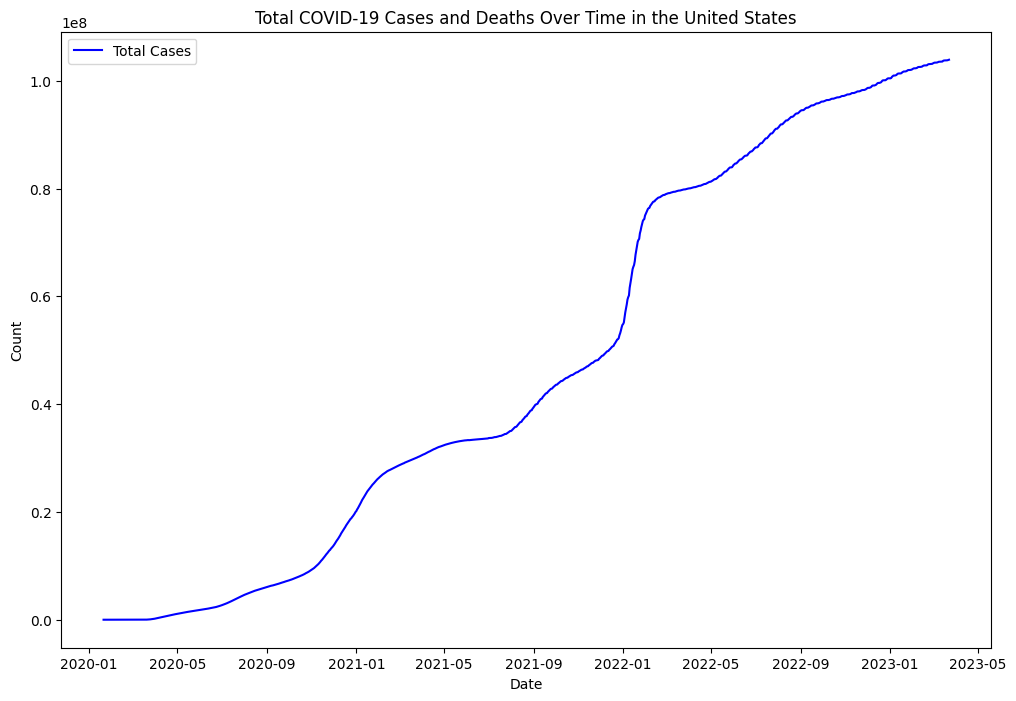

In [17]:
covid['date'] = pd.to_datetime(covid['date'])
total_us_data = covid.groupby('date').agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()
plt.figure(figsize=(12, 8))
plt.plot(total_us_data['date'], total_us_data['cases'], label='Total Cases', color='blue')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Total COVID-19 Cases and Deaths Over Time in the United States')
plt.legend()
plt.show()

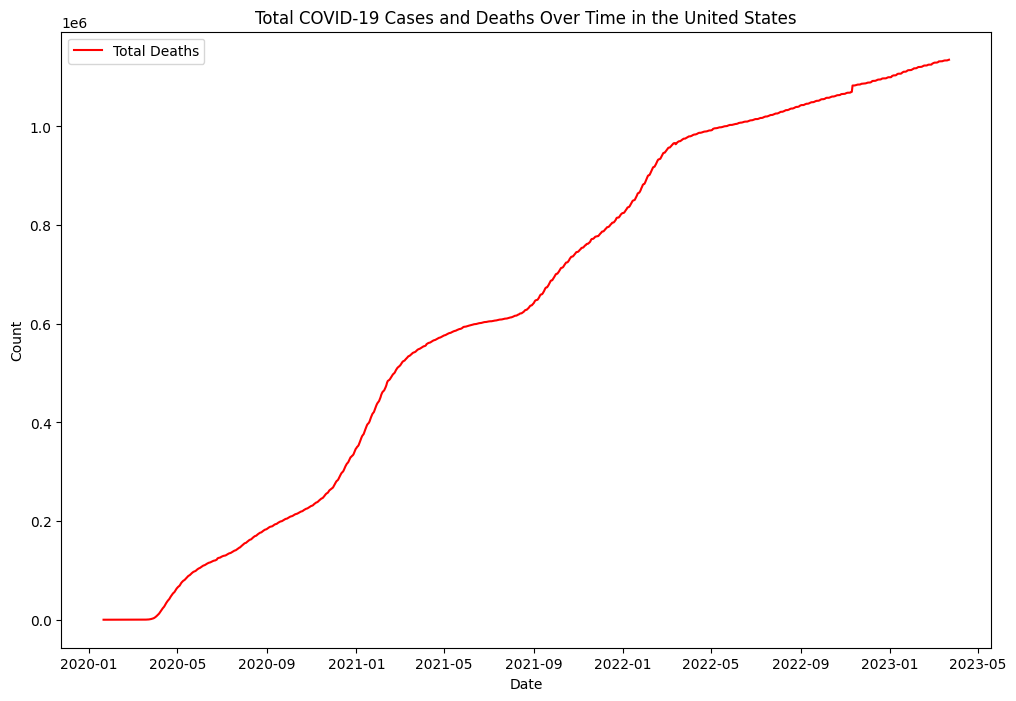

In [15]:
covid['date'] = pd.to_datetime(covid['date'])
total_us_data = covid.groupby('date').agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()
plt.figure(figsize=(12, 8))
plt.plot(total_us_data['date'], total_us_data['deaths'], label='Total Deaths', color='red')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Total COVID-19 Cases and Deaths Over Time in the United States')
plt.legend()
plt.show()

The two graphs show the realationship between total deaths and the new cases recorded. It shows that with increase in the cases recorded so thus the deaths recorded increases.

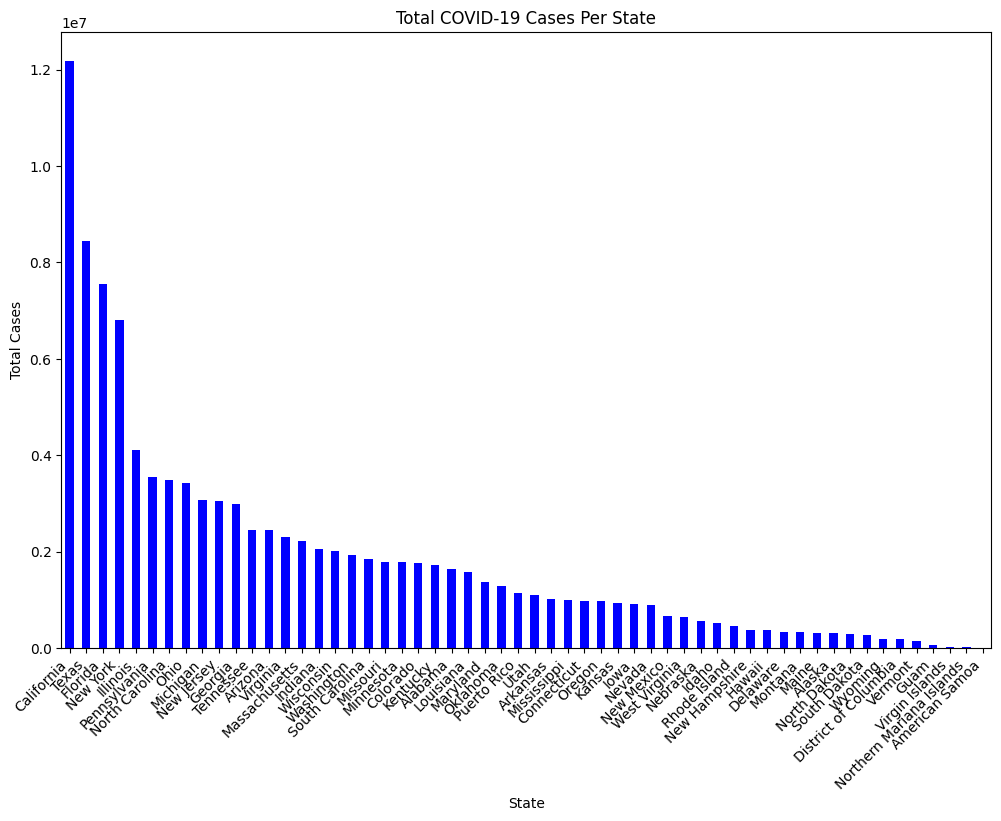

In [21]:
#ploting cases per state.
total_cases_per_state = covid.groupby('state')['cases'].max().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
total_cases_per_state.plot(kind='bar', color='blue')
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases Per State')
plt.xticks(rotation=45, ha='right')
plt.show()

From the graph above it shows that the state of california recorded highest cases followed by Texas and the least was Samoa.



---



## Submitting Your Work

Submit your work as usual.